# Yoonhyuck WOO / Purdue University_Computer and Information Technology
# Title: Logistic Regression and Fully-Connected Neural Network
# Professor: Jin Wei-Kocsis, Ph.D

The lab report will be due by **October 27th, 2023**.

**※ Requirement: Please submit the ipynb file of your lab via the link in Brightspace.**

In [1]:
# import the tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

##**Problem 1**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_1.csv.

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

In [3]:
# Obtain your data samples
data = pd.read_csv('sample_data/Data_Lab2_1.csv') # you may need to change the path
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values

print(x_data[:5])

[[-0.91859615  0.62893703]
 [-1.924494   -0.0794866 ]
 [ 1.60121298 -1.6515975 ]
 [-2.60944867 -0.43461163]
 [ 0.70473497  0.53858448]]


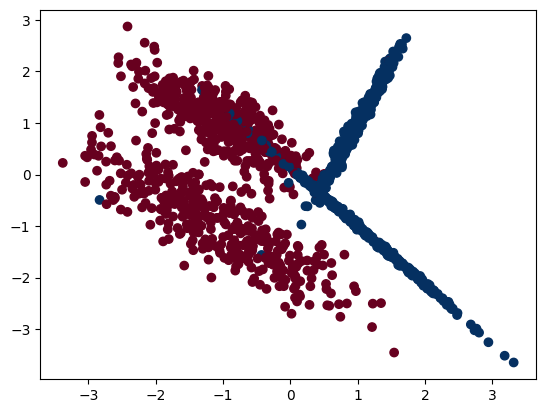

In [4]:
plt.scatter(x_data[:,0], x_data[:,1], c = y_data, cmap = "RdBu")
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

# Design the logistic regression model

In [10]:
model = models.Sequential()
model.add(layers.Normalization(input_shape = [2,], axis = None))

# do not apply any regularizer
# model.add(layers.Dense(1, activation = 'sigmoid'))

# apply regularizer
model.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6 (28.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


# Compile and training the fully-connected NN model



Epoch 1/330
33/33 [==============================] - 1s 15ms/step - loss: 1.2834 - mean_absolute_error: 0.6316 - accuracy: 0.3114 - val_loss: 1.1946 - val_mean_absolute_error: 0.6170 - val_accuracy: 0.3133
Epoch 2/330
33/33 [==============================] - 0s 7ms/step - loss: 1.2514 - mean_absolute_error: 0.6277 - accuracy: 0.3162 - val_loss: 1.1661 - val_mean_absolute_error: 0.6132 - val_accuracy: 0.3178
Epoch 3/330
33/33 [==============================] - 0s 8ms/step - loss: 1.2197 - mean_absolute_error: 0.6239 - accuracy: 0.3190 - val_loss: 1.1376 - val_mean_absolute_error: 0.6092 - val_accuracy: 0.3244
Epoch 4/330
33/33 [==============================] - 0s 8ms/step - loss: 1.1882 - mean_absolute_error: 0.6199 - accuracy: 0.3210 - val_loss: 1.1095 - val_mean_absolute_error: 0.6051 - val_accuracy: 0.3244
Epoch 5/330
33/33 [==============================] - 0s 7ms/step - loss: 1.1573 - mean_absolute_error: 0.6157 - accuracy: 0.3229 - val_loss: 1.0821 - val_mean_absolute_error: 0.60

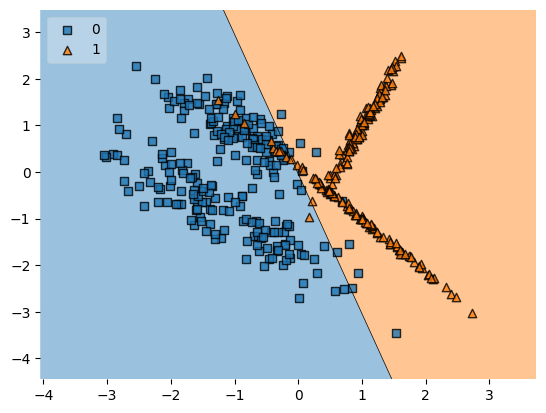

In [11]:
with tf.device('/device:GPU:0'):

  adam = optimizers.Adam(learning_rate = 0.001)

  model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['mean_absolute_error',
                       'accuracy'])

  history = model.fit(x_train, y_train, epochs=330,
                    validation_data=(x_test, y_test))
  plot_decision_regions(x_test, y_test, clf=model, legend=2)
  plt.show()

# Q1 Train & Test Error & Accuracy

Train Error: 0.1416822 	 Test Error: 0.0962298 Accuracy: 0.9488889


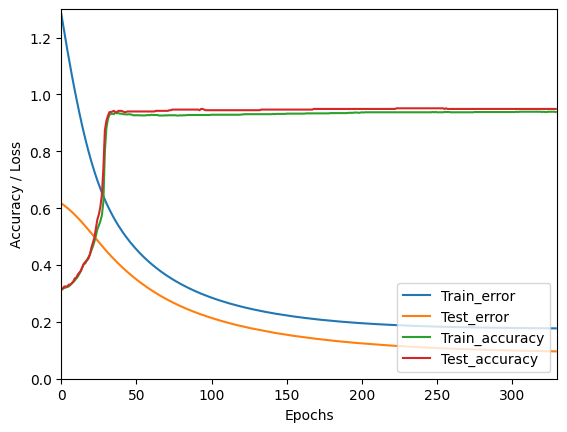

In [35]:
# Evaluate the fully connected neural network Model
plt.plot(history.history['loss'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test_accuracy')


plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history.history['mean_absolute_error'])])
plt.ylim([0, 1.3])
plt.legend(loc='lower right')

results = model.evaluate(x_test, y_test, verbose = 0)
print('Train Error:', round(results[0], 7), '\t', 'Test Error:',  round(results[1], 7),'Accuracy:',  round(results[2], 7))

##**Problem 2**
In this problem, we will explore applying fully-connected neural network to realize binary-class classification on the data in Data_Lab2_1.csv.

Requirments:
*   You need to include the following four components in your lab report: (1) the codes, (2) the structure of the fully-connected neural network that you design, including the number of layers and the number of computing nodes in each layer, (3) the obtained training error, and (4) the obtained testing error.

(※ Comment: There is no unique solution for the design of the fully-connected neural network.)

# Structure of the fully-connected neural network
Layers: 3
Nodes: 10, 5, 1

In [14]:
# Design a fully-connected neural network with one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node (totally three layers)
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape = [2,], axis = None))
model2.add(layers.Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model2.add(layers.Dense(5, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model2.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 94 (380.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Epoch 1/300
33/33 [==============================] - 3s 30ms/step - loss: 0.6840 - mean_absolute_error: 0.4726 - accuracy: 0.8286 - val_loss: 0.6395 - val_mean_absolute_error: 0.4501 - val_accuracy: 0.9178
Epoch 2/300
33/33 [==============================] - 0s 6ms/step - loss: 0.6007 - mean_absolute_error: 0.4236 - accuracy: 0.9171 - val_loss: 0.5673 - val_mean_absolute_error: 0.4043 - val_accuracy: 0.9444
Epoch 3/300
33/33 [==============================] - 0s 6ms/step - loss: 0.5362 - mean_absolute_error: 0.3803 - accuracy: 0.9390 - val_loss: 0.5060 - val_mean_absolute_error: 0.3619 - val_accuracy: 0.9444
Epoch 4/300
33/33 [==============================] - 0s 6ms/step - loss: 0.4794 - mean_absolute_error: 0.3396 - accuracy: 0.9429 - val_loss: 0.4458 - val_mean_absolute_error: 0.3182 - val_accuracy: 0.9533
Epoch 5/300
33/33 [==============================] - 0s 6ms/step - loss: 0.4203 - mean_absolute_error: 0.2943 - accuracy: 0.9438 - val_loss: 0.3777 - val_mean_absolute_error: 0.26

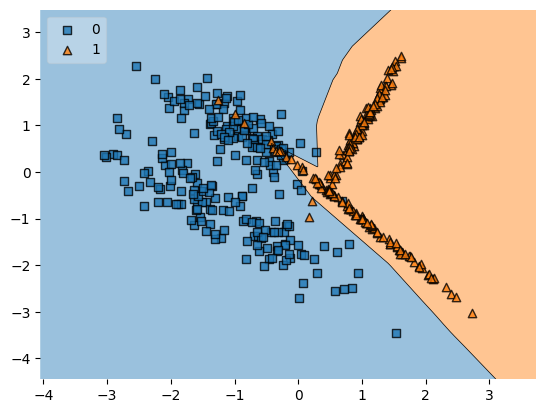

In [15]:
# Compile and training the fully-connected NN model

with tf.device('/device:GPU:0'):

  model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mean_absolute_error',
                       'accuracy'])

  history2 = model2.fit(x_train, y_train, epochs = 300,
                    validation_data=(x_test, y_test))
  plot_decision_regions(x_test, y_test, clf=model2, legend=2)
  plt.show()

# Q2 Train & Test Error & Accuracy


15/15 - 0s - loss: 0.1133 - mean_absolute_error: 0.0619 - accuracy: 0.9667 - 105ms/epoch - 7ms/step
Train Error: 0.1133424 	 Test Error: 0.0619079 Accuracy: 0.9666666


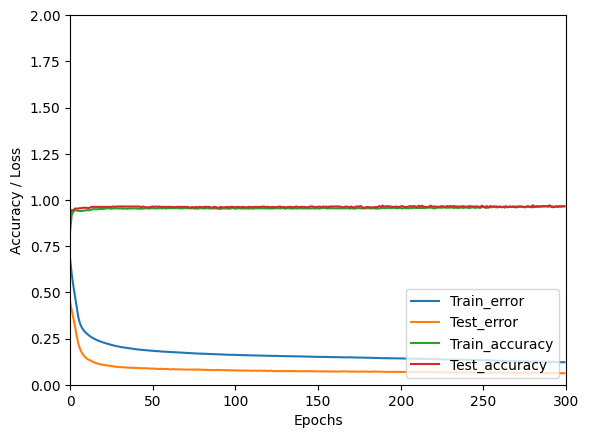

In [36]:
# Evaluate the fully connected neural network Model
plt.plot(history2.history['loss'], label='Train_error')
plt.plot(history2.history['val_mean_absolute_error'], label = 'Test_error')
plt.plot(history2.history['accuracy'], label = 'Train_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history2.history['mean_absolute_error'])])
plt.ylim([0, 2])
plt.legend(loc='lower right')

results2 = model2.evaluate(x_test,  y_test, verbose=2)
print('Train Error:', round(results2[0], 7), '\t', 'Test Error:',  round(results2[1], 7), 'Accuracy:',  round(results2[2], 7))

Train Error: 0.1470944 	 Test Error: 0.0730211

##**Problem 3**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_2.csv.

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

(※ Comment: It is fine if you cannot obtain high accuracy.)

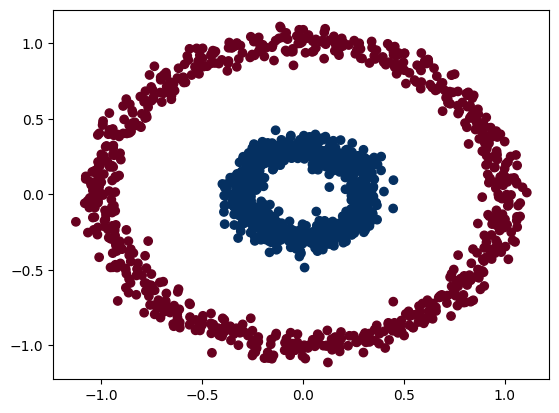

In [17]:
# Obtain your data samples
data2 = pd.read_csv('sample_data/Data_Lab2_2.csv') # you may need to change the path
data2_x_0 = data2['x_data_0'].values
data2_x_1 = data2['x_data_1'].values
data2_x_data = np.stack((data2_x_0, data2_x_1), axis=1)
data2_y_data = data2['y_data'].values
plt.scatter(data2_x_data[:,0], data2_x_data[:,1], c=data2_y_data, cmap = "RdBu")
plt.show()

In [18]:
print(data2_x_data[:5])

[[ 0.78921714  0.6074059 ]
 [-0.92939989 -0.46662667]
 [ 0.32965888 -0.96183659]
 [-0.99306802  0.45814652]
 [ 0.22279715 -1.00275623]]


In [19]:
x2_train, x2_test, y2_train, y2_test = train_test_split(data2_x_data, data2_y_data, test_size = 0.3)

In [51]:
model3 = models.Sequential()
model3.add(layers.Normalization(input_shape = [2,], axis = None))

# do not apply any regularizer
# model.add(layers.Dense(1, activation = 'sigmoid'))

# apply regularizer
model3.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliz  (None, 2)                 3         
 ation)                                                          
                                                                 
 dense_24 (Dense)            (None, 1)                 3         
                                                                 
Total params: 6 (28.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Epoch 1/400
33/33 [==============================] - 1s 10ms/step - loss: 0.7115 - mean_absolute_error: 0.5010 - accuracy: 0.5029 - val_loss: 0.7047 - val_mean_absolute_error: 0.4979 - val_accuracy: 0.4844
Epoch 2/400
33/33 [==============================] - 0s 6ms/step - loss: 0.7105 - mean_absolute_error: 0.5010 - accuracy: 0.5029 - val_loss: 0.7040 - val_mean_absolute_error: 0.4980 - val_accuracy: 0.4844
Epoch 3/400
33/33 [==============================] - 0s 5ms/step - loss: 0.7094 - mean_absolute_error: 0.5009 - accuracy: 0.5029 - val_loss: 0.7032 - val_mean_absolute_error: 0.4981 - val_accuracy: 0.4822
Epoch 4/400
33/33 [==============================] - 0s 5ms/step - loss: 0.7084 - mean_absolute_error: 0.5008 - accuracy: 0.5019 - val_loss: 0.7026 - val_mean_absolute_error: 0.4982 - val_accuracy: 0.4844
Epoch 5/400
33/33 [==============================] - 0s 7ms/step - loss: 0.7075 - mean_absolute_error: 0.5008 - accuracy: 0.4981 - val_loss: 0.7020 - val_mean_absolute_error: 0.49

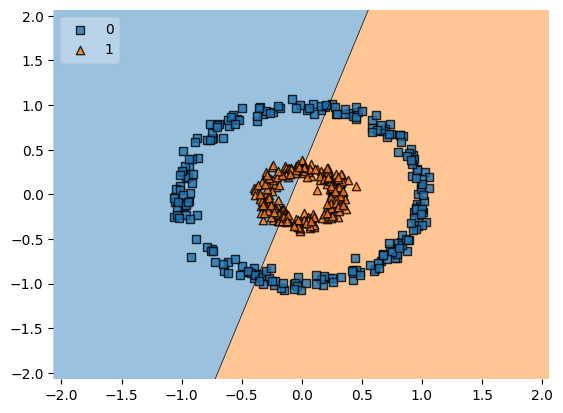

In [52]:
with tf.device('/device:GPU:0'):

  adam = optimizers.Adam(learning_rate = 0.0001) # default = 0.001

  model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mean_absolute_error',
                       'accuracy'])

  history3 = model3.fit(x2_train, y2_train, epochs=400,
                    validation_data=(x2_test, y2_test))
  plot_decision_regions(x2_test, y2_test, clf=model3, legend=2)
  plt.show()

# P3 Train & Test Error & Accuracy

15/15 - 0s - loss: 0.6971 - mean_absolute_error: 0.5006 - accuracy: 0.5111 - 54ms/epoch - 4ms/step
Train Error: 0.697116 	 Test Error: 0.5006011 Accuracy 0.5111111


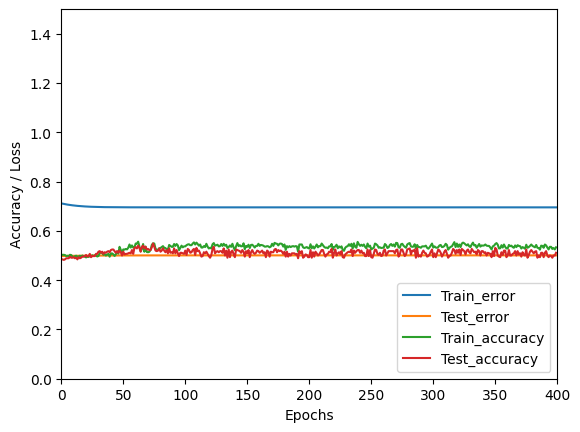

In [53]:
# Evaluate the fully connected neural network Model
plt.plot(history3.history['loss'], label='Train_error')
plt.plot(history3.history['val_mean_absolute_error'], label = 'Test_error')
plt.plot(history3.history['accuracy'], label = 'Train_accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history3.history['mean_absolute_error'])])
plt.ylim([0, 1.5])
plt.legend(loc='lower right')

results3 = model3.evaluate(x2_test,  y2_test, verbose=2)
print('Train Error:', round(results3[0], 7), '\t', 'Test Error:',  round(results3[1], 7), 'Accuracy',  round(results3[2], 7))

##**Problem 4**
In this problem, we will explore applying fully-connected neural network to realize binary-class classification on the data in Data_Lab2_2.csv.

Requirments:
*   You need to include the following four components in your lab report: (1) the codes, (2) the structure of the fully-connected neural network that you design, including the number of layers and the number of computing nodes in each layer, (3) the obtained training error, and (4) the obtained testing error.

(※ Comment: There is no unique solution for the design of the fully-connected neural network.)

# Structure of the fully-connected neural network
Layers: 4 Nodes: 20, 10, 5, 1

In [31]:
# Design a fully-connected neural network with one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node (totally three layers)
model4 = models.Sequential()
model4.add(layers.Normalization(input_shape = [2,], axis = None))
model4.add(layers.Dense(20, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model4.add(layers.Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model4.add(layers.Dense(5, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model4.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 5)                 55        
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 334 (1.31 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 3 (16.00 Byte)
_______________________

Epoch 1/300
33/33 [==============================] - 2s 14ms/step - loss: 0.6987 - mean_absolute_error: 0.4988 - accuracy: 0.5810 - val_loss: 0.6938 - val_mean_absolute_error: 0.4965 - val_accuracy: 0.5467
Epoch 2/300
33/33 [==============================] - 0s 7ms/step - loss: 0.6845 - mean_absolute_error: 0.4918 - accuracy: 0.6010 - val_loss: 0.6737 - val_mean_absolute_error: 0.4858 - val_accuracy: 0.5222
Epoch 3/300
33/33 [==============================] - 0s 8ms/step - loss: 0.6597 - mean_absolute_error: 0.4779 - accuracy: 0.5667 - val_loss: 0.6421 - val_mean_absolute_error: 0.4678 - val_accuracy: 0.7200
Epoch 4/300
33/33 [==============================] - 0s 7ms/step - loss: 0.6223 - mean_absolute_error: 0.4557 - accuracy: 0.8124 - val_loss: 0.5980 - val_mean_absolute_error: 0.4400 - val_accuracy: 0.8378
Epoch 5/300
33/33 [==============================] - 0s 8ms/step - loss: 0.5714 - mean_absolute_error: 0.4222 - accuracy: 0.9210 - val_loss: 0.5390 - val_mean_absolute_error: 0.39

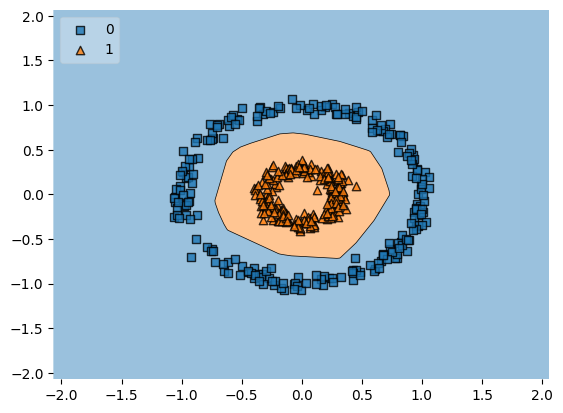

In [32]:
# Compile and training the fully-connected NN model

with tf.device('/device:GPU:0'):


  model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mean_absolute_error',
                       'accuracy'])

  history4 = model4.fit(x2_train, y2_train, epochs = 300,
                    validation_data=(x2_test, y2_test))
  plot_decision_regions(x2_test, y2_test, clf=model4, legend=2)
  plt.show()

# P4 Train & Test Error & Accuracy


15/15 - 0s - loss: 0.0187 - mean_absolute_error: 0.0037 - accuracy: 1.0000 - 80ms/epoch - 5ms/step
Train Error: 0.0187153 	 Test Error: 0.0036631 	 Accuracy: 1.0


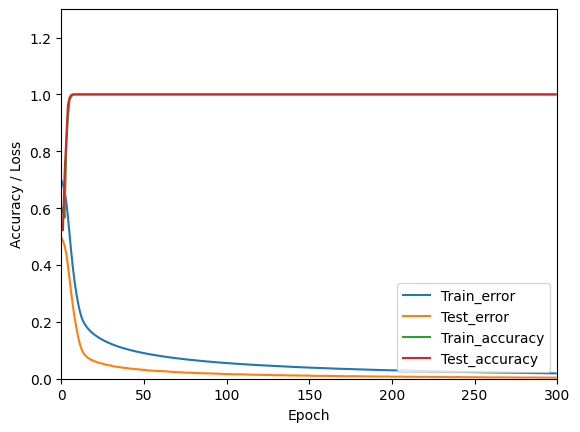

In [34]:
# Evaluate the fully connected neural network Model
plt.plot(history4.history['loss'], label='Train_error')
plt.plot(history4.history['val_mean_absolute_error'], label = 'Test_error')
plt.plot(history4.history['accuracy'], label = 'Train_accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, 300])
plt.ylim([0, 1.3])
plt.legend(loc='lower right')

results4 = model4.evaluate(x2_test,  y2_test, verbose=2)
print('Train Error:', round(results4[0], 7), '\t', 'Test Error:',  round(results4[1], 7), '\t', 'Accuracy:',  round(results4[2], 7))